<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif-:" data-toc-modified-id="Objectif-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif :</a></span></li><li><span><a href="#Dev" data-toc-modified-id="Dev-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dev</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Industrialisation</a></span><ul class="toc-item"><li><span><a href="#Script" data-toc-modified-id="Script-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Script</a></span></li></ul></li><li><span><a href="#Analyse-de-la-feature" data-toc-modified-id="Analyse-de-la-feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse de la feature</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-dépot-suivant-les-stations" data-toc-modified-id="Analyse-des-dépot-suivant-les-stations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analyse des dépot suivant les stations</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from vcub_keeper.reader.reader import *
from vcub_keeper.visualisation import plot_station_activity

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Objectif :

- Création d'une features afin de connaitre le nombre de prise de vélo qu'il y a eu pour une même station entre 2 points temporels. cf https://github.com/armgilles/vcub_keeper/issues/3
- Industrialisation de la fonction
- Analyse des résultats

## Dev

In [2]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

In [3]:
activite.head()

,gid,station_id,type,name,state,available_stands,available_bikes,date
0,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:03:04
1,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:04:04
2,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:09:04
3,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:14:03
4,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:19:04


In [5]:
activite['available_stands_shift'] = \
    activite.groupby('station_id')['available_stands'].shift(1)

activite['available_stands_shift'] = activite['available_stands_shift'].fillna(activite['available_stands'])

activite['transactions_out'] = activite['available_stands'] - activite['available_stands_shift']

activite.loc[activite['transactions_out'] < 0,
            'transactions_out'] = 0

In [6]:
activite[19655:19665]

,gid,station_id,type,name,state,available_stands,available_bikes,date,available_stands_shift,transactions_out
19655,83,1,VLS,Meriadeck,1,6,13,2017-09-19 18:44:04,6.0,0.0
19656,83,1,VLS,Meriadeck,1,9,10,2017-09-19 18:49:04,6.0,3.0
19657,83,1,VLS,Meriadeck,1,9,10,2017-09-19 18:54:05,9.0,0.0
19658,83,1,VLS,Meriadeck,1,10,9,2017-09-19 18:59:05,9.0,1.0
19659,83,1,VLS,Meriadeck,1,9,10,2017-09-19 19:04:03,10.0,0.0
19660,83,1,VLS,Meriadeck,1,8,11,2017-09-19 19:09:03,9.0,0.0
19661,83,1,VLS,Meriadeck,1,8,11,2017-09-19 19:14:05,8.0,0.0
19662,83,1,VLS,Meriadeck,1,9,10,2017-09-19 19:19:04,8.0,1.0
19663,83,1,VLS,Meriadeck,1,10,9,2017-09-19 19:24:04,9.0,1.0
19664,83,1,VLS,Meriadeck,1,12,7,2017-09-19 19:29:04,10.0,2.0


## Industrialisation

In [7]:
import pandas as pd 

def get_transactions_out(data):
    """
    Calcul le nombre de prise de vélo qu'il y a eu pour une même station entre 2 points de données

    Parameters
    ----------
    data : DataFrame
        Activité des stations Vcub

    Returns
    -------
    data : DataFrame
        Ajout de colonne 'transactions_out'

    Examples
    --------

    activite = get_transactions_out(activite)
    """

    data['available_stands_shift'] = \
        data.groupby('station_id')['available_stands'].shift(1)

    data['available_stands_shift'] = data['available_stands_shift'].fillna(data['available_stands'])

    data['transactions_out'] = data['available_stands'] - data['available_stands_shift']

    data.loc[data['transactions_out'] < 0,
             'transactions_out'] = 0

    # Drop non usefull column
    data.drop('available_stands_shift', axis=1, inplace=True)

    return data

In [8]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_out(activite)

In [9]:
activite[56020:56050]

,gid,station_id,type,name,state,available_stands,available_bikes,date,transactions_out
56020,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:14:03,0.0
56021,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:19:05,0.0
56022,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:24:05,0.0
56023,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:29:03,0.0
56024,41,3,VLS,Place Tartas,1,18,0,2017-08-26 20:34:04,1.0
56025,41,3,VLS,Place Tartas,1,18,0,2017-08-26 20:39:03,0.0
56026,41,3,VLS,Place Tartas,1,18,0,2017-08-26 20:44:03,0.0
56027,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:49:03,0.0
56028,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:54:04,0.0
56029,41,3,VLS,Place Tartas,1,17,1,2017-08-26 20:59:03,0.0


### Script

In [10]:
from vcub_keeper.reader.reader import *
from vcub_keeper.transform.features_factory import get_transactions_out

In [11]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_out(activite)

In [12]:
activite[136020:136050]

,gid,station_id,type,name,state,available_stands,available_bikes,date,transactions_out
136020,86,7,VLS,Palais de Justice,1,12,6,2017-08-02 10:20:05,0.0
136021,86,7,VLS,Palais de Justice,1,13,5,2017-08-02 10:25:04,1.0
136022,86,7,VLS,Palais de Justice,1,15,3,2017-08-02 10:30:05,2.0
136023,86,7,VLS,Palais de Justice,1,15,3,2017-08-02 10:35:04,0.0
136024,86,7,VLS,Palais de Justice,1,15,3,2017-08-02 10:40:03,0.0
136025,86,7,VLS,Palais de Justice,1,16,2,2017-08-02 10:55:03,1.0
136026,86,7,VLS,Palais de Justice,1,16,2,2017-08-02 11:00:03,0.0
136027,86,7,VLS,Palais de Justice,1,16,2,2017-08-02 11:05:04,0.0
136028,86,7,VLS,Palais de Justice,1,16,2,2017-08-02 11:10:04,0.0
136029,86,7,VLS,Palais de Justice,1,17,1,2017-08-02 11:15:03,1.0


## Analyse de la feature

In [13]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_out(activite)

In [14]:
activite.head()

,gid,station_id,type,name,state,available_stands,available_bikes,date,transactions_out
0,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:03:04,0.0
1,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:04:04,0.0
2,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:09:04,0.0
3,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:14:03,0.0
4,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:19:04,0.0


In [15]:
activite['transactions_out'].describe()

count    3.761880e+06
mean     1.295166e-01
std      5.021683e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.600000e+01
Name: transactions_out, dtype: float64

/home/gillesa/anaconda3/envs/vcub_keeper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='transactions_out'>

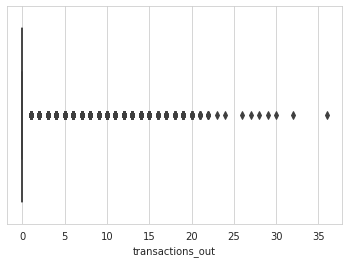

In [16]:
sns.boxplot(activite['transactions_out'])

/home/gillesa/anaconda3/envs/vcub_keeper/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='transactions_out', ylabel='Density'>

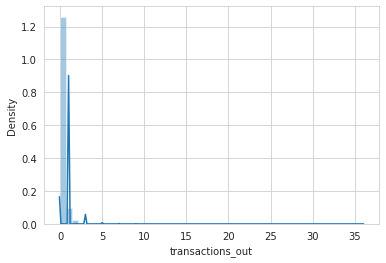

In [17]:
sns.distplot(activite['transactions_out'])

### Analyse des dépot suivant les stations

In [18]:
depot_by_station = \
    activite.groupby('station_id',
                     as_index=False)['transactions_out'].agg({'max': 'max',
                                                              'mean': 'mean',
                                                              'median': 'median',
                                                              'min': 'min',
                                                              'std': 'std',
                                                              'var': 'var',
                                                              'skew': 'skew',
                                                              '25%': lambda x: x.quantile(0.25),
                                                              '75%': lambda x: x.quantile(0.75),
                                                              '95%':  lambda x: x.quantile(0.95)
                                                             })

depot_by_station.sort_values('mean', ascending=0, inplace=True)

In [19]:
#depot_by_station.sort_values('mean')
depot_by_station

,station_id,max,mean,median,min,std,var,skew,25%,75%,95%
105,106,22.0,0.580296,0.0,0.0,1.075433,1.156557,3.125303,0.0,1.0,3.0
4,5,22.0,0.459112,0.0,0.0,0.965352,0.931905,3.404881,0.0,1.0,2.0
21,22,26.0,0.437974,0.0,0.0,0.981720,0.963774,4.607333,0.0,1.0,2.0
122,123,28.0,0.419750,0.0,0.0,0.880893,0.775973,4.100431,0.0,1.0,2.0
38,39,24.0,0.417160,0.0,0.0,0.920862,0.847987,3.659573,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
159,160,3.0,0.001203,0.0,0.0,0.047104,0.002219,45.954761,0.0,0.0,0.0
75,76,1.0,0.000046,0.0,0.0,0.006801,0.000046,147.037410,0.0,0.0,0.0
92,93,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
34,35,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [20]:
# Station les plus active sur les dépôt de vélo
plot_station_activity(activite, station_id=106, features_to_plot=['transactions_out'])